#  DATA ANALYTICS AND PREDICTION OF NSW HOUSE PRICE

**Project Owner: Brian Ong**
Sydney, 7th May 2023

I.	Introduction

1.	Overview of the Project:
The real estate industry remains one of the most attractive sectors for both investors and homebuyers, as owning property—whether as an investment or a family home—is a widely shared aspiration. Domain, one of the leading companies in the real estate market, has experienced significant growth, particularly with property prices climbing dramatically in recent years. Real estate encompasses various property types, including houses, apartments, and vacant land, and its trends often reflect the broader economic conditions of a country. Understanding these shifts is key, and my house price prediction project, focusing on Domain's data, aims to shed light on these developments and forecast future market behavior.

2.	Objectives of the Project and Define the problem

* House pricing is typically influenced by several factors, but in this dataset, the focus is on external factors like suburb characteristics and internal house features such as the number of bedrooms, bathrooms, and parking spaces. This approach helps reflect how the surrounding environment influences buyer trends in the housing market.

* After cleaning the data and removing outliers, the project performed EDA (Exploratory Data Analysis) based on two key insights. It also visualized the relationship between population, elevation, suburb income, and other features with price per square meter, providing a clearer picture of how these variables impact property value.

* Additionally, the project investigated a business question of Domain Dataset: Does increasing the number of rooms always lead to higher prices? Using statistical evidence, the analysis revealed that—even though the dataset is imbalanced for homes with a high number of rooms—there is over 15% support for this relationship.

* Finally, four models were applied: two time series models and two tree-based models, with and without feature engineering. This comparison highlighted the importance of AI and machine learning in price prediction and demonstrates how feature engineering significantly boosts model performance.

II.	Data Collection and Preprocessing
1.	Data Source:

    First Dataset: 
www.kaggle.com/datasets/alexlau203/sydney-house-prices
    
    Second Dataset: 
www.kaggle.com/datasets/karltse/sydney-suburbs-reviews

2.	Data Loading:

In [163]:
pip install -r requirements.txt



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\UOW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import missingno as msno
from scipy import stats
import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
# LOADING DATA
dataset1 = pd.read_csv('dataset/domain_properties.csv')
#Create a copy of dataset to working on
domain_df=dataset1.copy()

#Display all columns of dataset
pd.set_option('display.max_columns', None)
domain_df.head(3)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59


III.	Exploratory Data Analysis (EDA)
1. Summary Statistics

In [166]:
domain_df.describe()

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
count,1.116000e+04,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826
std,1.290371e+06,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113
min,2.250000e+05,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000
25%,1.002000e+06,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000
50%,1.388000e+06,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000
75%,2.020000e+06,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000
max,6.000000e+07,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000


2. Data Cleaning and Datatype Modification

- Identify Duplicate and Handle Missing Data

In [5]:
# CHECK DUPLICATE AND NULL DATA
domain_df.drop_duplicates()

#Replace all +/-infinite data by null value to double check invalid data
domain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
domain_df.isna().sum()

price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

- Datatype Convertion

In [168]:
#EXPLORING FEATURE
domain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

* Data Convertion and Feature Analysis

In [6]:
#convert string datatype of date_sold to datetime
domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])

#Add price per square to have a better objective view of housing price
domain_df['price_per_square']=round((domain_df['price']/domain_df['property_size']),1)

#Add suburb population per km2 reveal ratio of population and size of suburb
domain_df['suburb_population_per_km2']=round((domain_df['suburb_population']/(domain_df['suburb_sqkm'])),1)

#Add year, month columns
domain_df['year_sold']=domain_df['date_sold'].dt.year
domain_df['month_sold']=domain_df['date_sold'].dt.month
domain_df['month_name_sold']=domain_df['date_sold'].dt.month_name().str[:3]

#Create quarterize function to add quarter column in dataset
def quaterize(month,year):
    match month:
        case 1|2|3:
            return f'{year}-Q1'
        case 4|5|6:
            return f'{year}-Q2'
        case 7|8|9:
            return f'{year}-Q3'
        case 10|11|12:
            return f'{year}-Q4'
        case _:
            return 'invalid'

#Apply function row by row
domain_df['quarter_sold']=domain_df.apply(lambda row:quaterize(row['month_sold'],row['year_sold']),axis=1)

C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\1742404376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])


- Data Validation and Correction

In [7]:
#Correct the type of house in dataset (all the num_bath, bed, parking =0 while its not vacant land)
domain_df.loc[
    (domain_df['type'] != 'Vacant land') & 
    (domain_df['num_bath'] == 0) & 
    (domain_df['num_bed'] == 0) & 
    (domain_df['num_parking'] == 0), 
    'type'
] = 'Vacant land'

# Second, Correct the type of house in dataset
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
vacant_land_category_error=domain_df[((domain_df['num_bath']>0) | (domain_df['num_bed']>0) | (domain_df['num_parking']>0)) &(domain_df['type']=='Vacant land')]
print('Vancant land with number of bed, bath, parking greater than zero: ',vacant_land_category_error.shape[0])

#Remove it!
domain_df=domain_df.drop(vacant_land_category_error.index,axis=0)
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11160
Vancant land with number of bed, bath, parking greater than zero:  9
Domain Data before checking outlier with vancant land:  11151


- Outlier Detection and Removal

In [8]:
from sklearn.ensemble import IsolationForest

# Define the model
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% of data is assumed to be outliers

# Fit and predict (outliers get -1 label)
outlier_labels = iso_forest.fit_predict(domain_df[['price']])

# Keep only inliers (label = 1)
approach1_house_category = domain_df[outlier_labels == 1]

print(f"Approach 1 dataset size: {len(approach1_house_category)}")


Approach 1 dataset size: 10930


In [9]:
# Assuming domain_df is already defined
median_price = domain_df['price'].median()
mad = stats.median_abs_deviation(domain_df['price'])  # Calculate MAD

# Compute modified Z-score
modified_z_scores = 0.6745 * (domain_df['price'] - median_price) / mad

# Use threshold (commonly 3.5)
threshold = 3.5
approach2_house_category = domain_df[abs(modified_z_scores) < threshold]

print(f"Approach 2 dataset size: {len(approach2_house_category)}")


Approach 2 dataset size: 10760


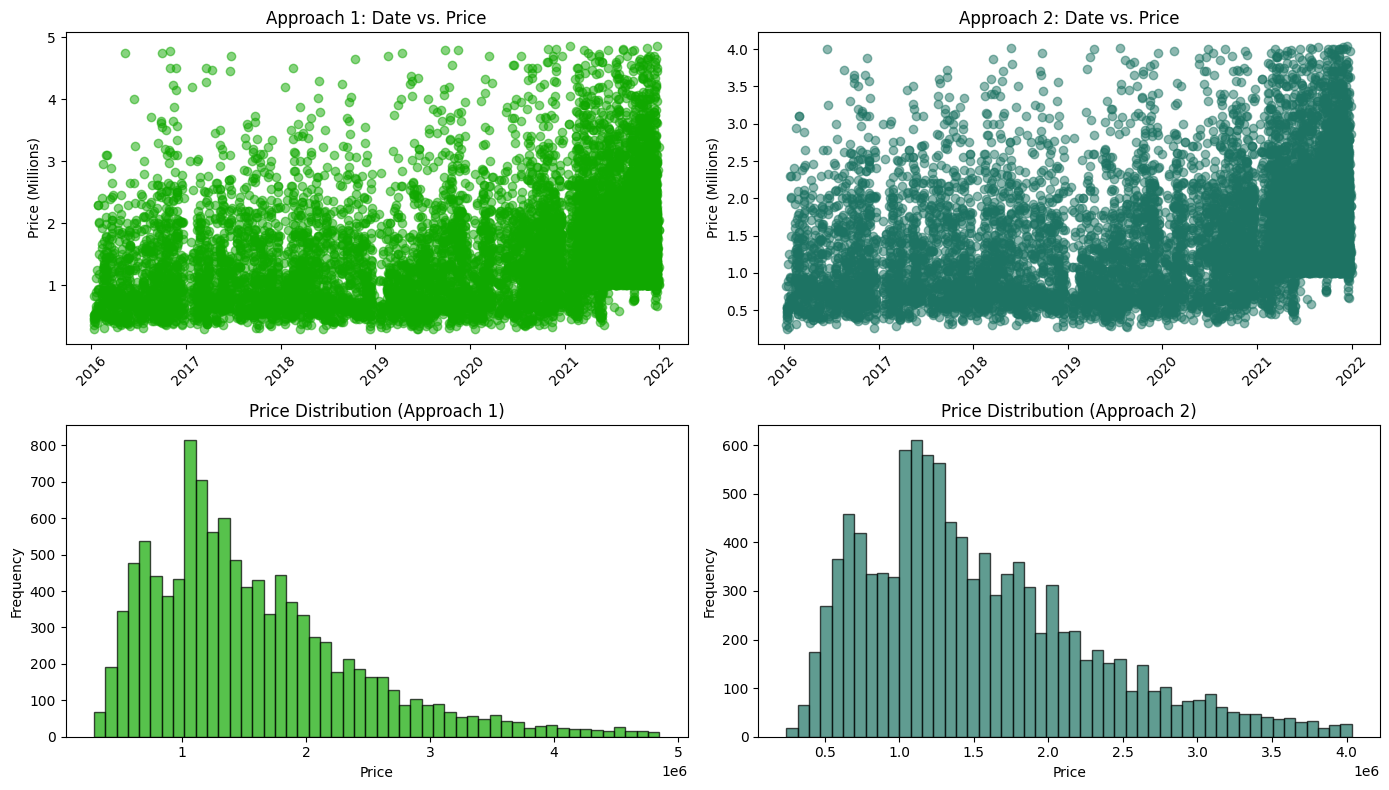

In [10]:
# approach1_house_category → Approach 1 (e.g. Modified Z-Score)
# approach2_house_category → Approach 2 (e.g. Isolation Forest)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Top-Left: Scatter plot - Approach 1
axs[0, 0].scatter(approach1_house_category['date_sold'], 
                  approach1_house_category['price'] / 1e6, 
                  color='#10a800', alpha=0.5)
axs[0, 0].set_title('Approach 1: Date vs. Price')
axs[0, 0].set_ylabel('Price (Millions)')
axs[0, 0].set_xlabel('')
axs[0, 0].tick_params(axis='x', rotation=45)

# Top-Right: Scatter plot - Approach 2
axs[0, 1].scatter(approach2_house_category['date_sold'], 
                  approach2_house_category['price'] / 1e6, 
                  color='#1d7363', alpha=0.5)
axs[0, 1].set_title('Approach 2: Date vs. Price')
axs[0, 1].set_ylabel('Price (Millions)')
axs[0, 1].set_xlabel('')
axs[0, 1].tick_params(axis='x', rotation=45)

# Bottom-Left: Histogram - Approach 1
axs[1, 0].hist(approach1_house_category['price'], bins=50, 
               color='#10a800', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Price Distribution (Approach 1)')
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Frequency')

# Bottom-Right: Histogram - Approach 2
axs[1, 1].hist(approach2_house_category['price'], bins=50, 
               color='#1d7363', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Price Distribution (Approach 2)')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Since the second approach (IQR method) removes a substantial portion of the data, particularly houses sold in the 4M to 6M range, this could distort the overall trend in the dataset. Therefore, I decided to use the first approach, which is based on percentiles, to remove outliers. This method allows us to retain more data and better capture the general market trends.

In [11]:
domain_df=approach2_house_category

3. Data Analysis and Visualization



In [12]:
#Simply house type by grouping properties into 4 groups
domain_df.loc[(domain_df['type'] == 'House'), 'segment'] = 'House'
domain_df.loc[(domain_df['type'] == 'Apartment / Unit / Flat'), 'segment'] = 'Apartment'
domain_df.loc[(domain_df['type'] == 'Vacant land'), 'segment'] = 'Vacant land'
domain_df.loc[(domain_df['type'] != 'Vacant land') &
              (domain_df['type'] != 'Apartment / Unit / Flat') &
              (domain_df['type'] != 'House'), 'segment'] = 'Others'

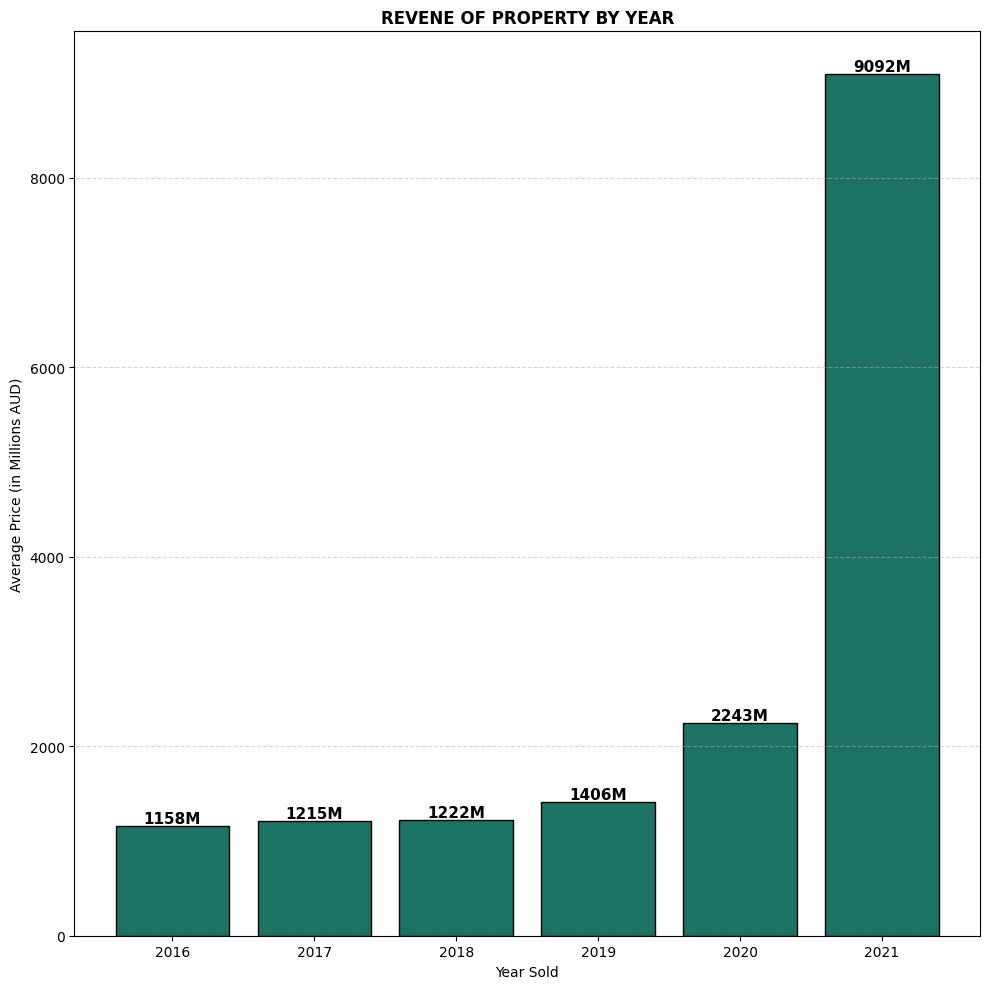

In [15]:
# Group by year and calculate average price
grouped_data = domain_df[domain_df['year_sold'] != 2022].groupby('year_sold')['price'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 10))
plt.bar(grouped_data['year_sold'], grouped_data['price'] / 1e6, color='#1d7363', edgecolor='black')

# Annotate bars with price values
for i, value in enumerate(grouped_data['price']):
    plt.text(grouped_data['year_sold'][i], value / 1e6 + 0.05, f'{value/1e6:.0f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Titles and labels
plt.title('REVENE OF PROPERTY BY YEAR', fontweight='bold')
plt.xlabel('Year Sold')
plt.ylabel('Average Price (in Millions AUD)')
plt.xticks(grouped_data['year_sold'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


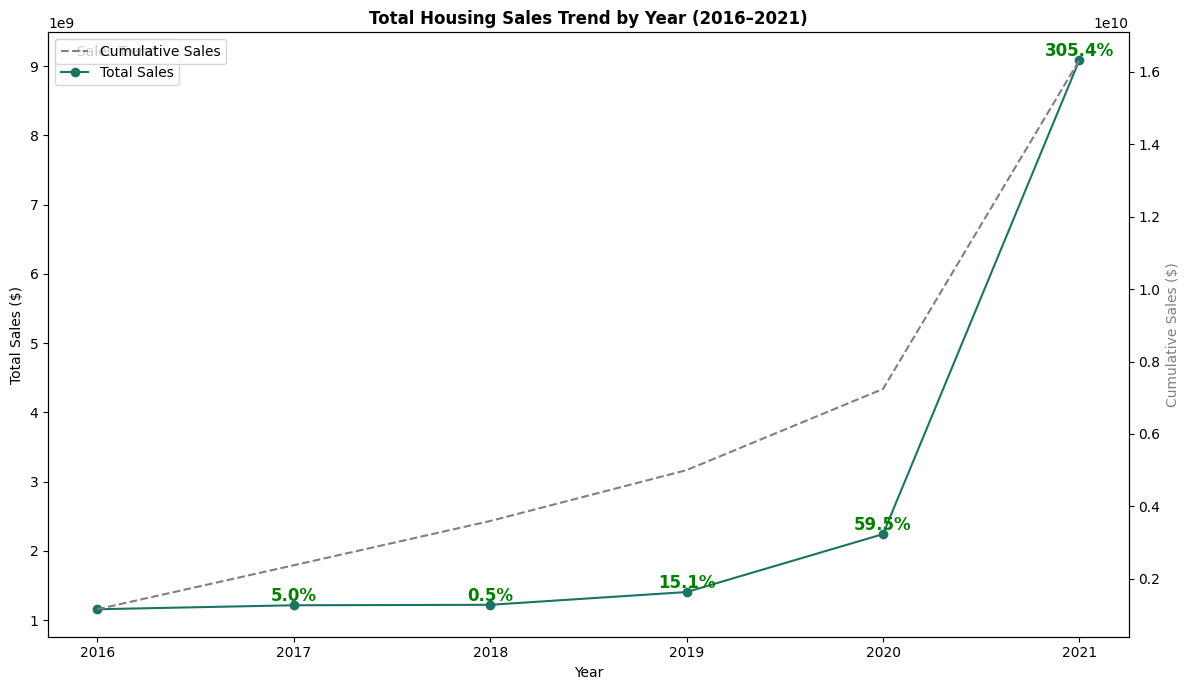

In [16]:
# Define colors
main_color = '#1d7363'  # Main sales trend color
cumulative_color = 'gray'  # Cumulative sales trend

# Filter out unnecessary data
filtered_data = domain_df[domain_df['year_sold'] != 2022]  # remove 2022

# Group by year, summing up all sales
grouped_data = filtered_data.groupby(['year_sold'])['price'].sum().reset_index()
grouped_data['pct_change'] = grouped_data['price'].pct_change() * 100 # Compute percentage change

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(grouped_data['year_sold'], grouped_data['price'], marker='o', linestyle='-', 
         label='Total Sales', color=main_color)

# Annotate % change at key points (spikes or dips) with green for positive, red for negative
for idx in grouped_data.index:
    pct_change = grouped_data.loc[idx, 'pct_change']
    if abs(pct_change) > 0:
        color = 'green' if pct_change > 0 else 'red'
        ax1.text(grouped_data.loc[idx, 'year_sold'], grouped_data.loc[idx, 'price'],
                 f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=12,
                 color=color, fontweight='bold')

# Secondary y-axis for cumulative sales
ax2 = ax1.twinx()
grouped_data['cumulative_sales'] = grouped_data['price'].cumsum()
ax2.plot(grouped_data['year_sold'], grouped_data['cumulative_sales'],
         color=cumulative_color, linestyle='dashed', label='Cumulative Sales')

# Formatting
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales ($)')
ax2.set_ylabel('Cumulative Sales ($)', color=cumulative_color)
ax1.set_title('Total Housing Sales Trend by Year (2016–2021)', fontweight='bold')
ax1.set_xticks(grouped_data['year_sold'])
ax1.set_xticklabels(grouped_data['year_sold'], rotation=0)
ax1.legend(title='Sales Trend')
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()


- Overview of Domain Performance (2016-2021)

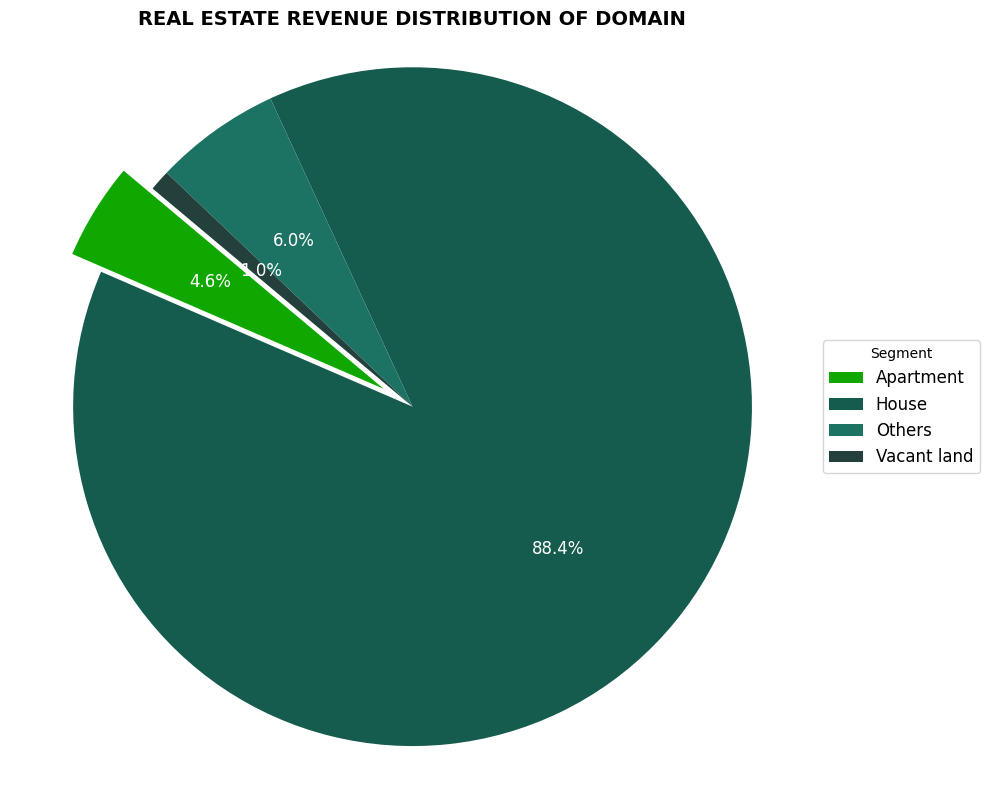

In [178]:
# Grouped data by segment
grouped_data = domain_df.groupby('segment')['price'].sum().reset_index()

# Pie chart config
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0)
labels = grouped_data['segment']
sizes = grouped_data['price']
colors = ['#10a800', '#155c4f', '#1d7363', '#23403d']

# Draw pie and capture returned handles
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

# Set white color for % text
for autotext in autotexts:
    autotext.set_color('white')


plt.legend(wedges, labels, title="Segment", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('REAL ESTATE REVENUE DISTRIBUTION OF DOMAIN', fontweight='bold', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


* Stacked Bar Chart: Sold Houses by Segment

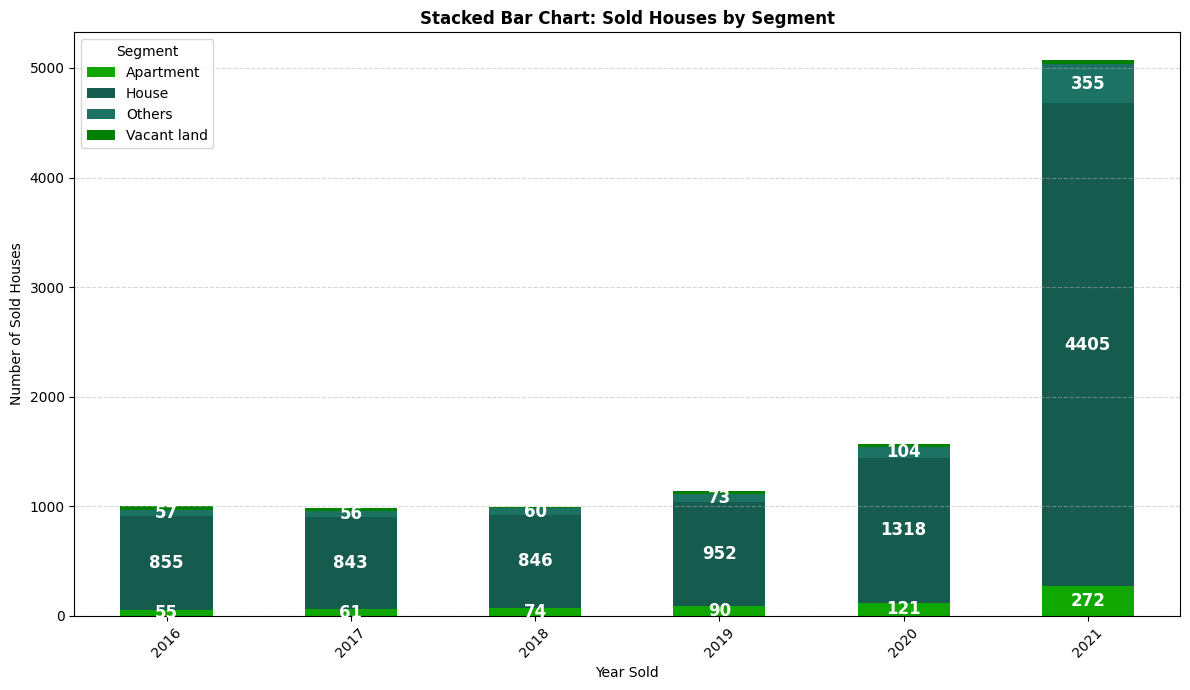

In [179]:
# Group and pivot data
transactions = domain_df.groupby(['year_sold', 'segment'])['price'].count().reset_index()
transactions = transactions[transactions['year_sold'] != 2022]
transactions_pivot = transactions.pivot(index='year_sold', columns='segment', values='price').fillna(0)

# Define 4-color palette
colors_palette = ['#10a800', '#155c4f', '#1d7363', 'green']

# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot stacked bar chart
transactions_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=colors_palette
)
ax1.set_xlabel('Year Sold')
ax1.set_ylabel('Number of Sold Houses')
ax1.set_title('Stacked Bar Chart: Sold Houses by Segment', fontweight='bold')
ax1.legend(title='Segment', loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Add white labels for values >= 40
for container in ax1.containers:
    labels = [int(v) if v >= 40 else '' for v in container.datavalues]
    texts = ax1.bar_label(container, labels=labels, label_type='center', fontsize=12,  fontweight='bold')
    for text in texts:
        text.set_color('white')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()



In [17]:
# Filter only House and Apartment data (excluding 2022), we focus on 2 type only
domain_df = domain_df[
    (domain_df['segment'].isin(['House', 'Apartment'])) &
    (domain_df['year_sold'] != 2022)
]

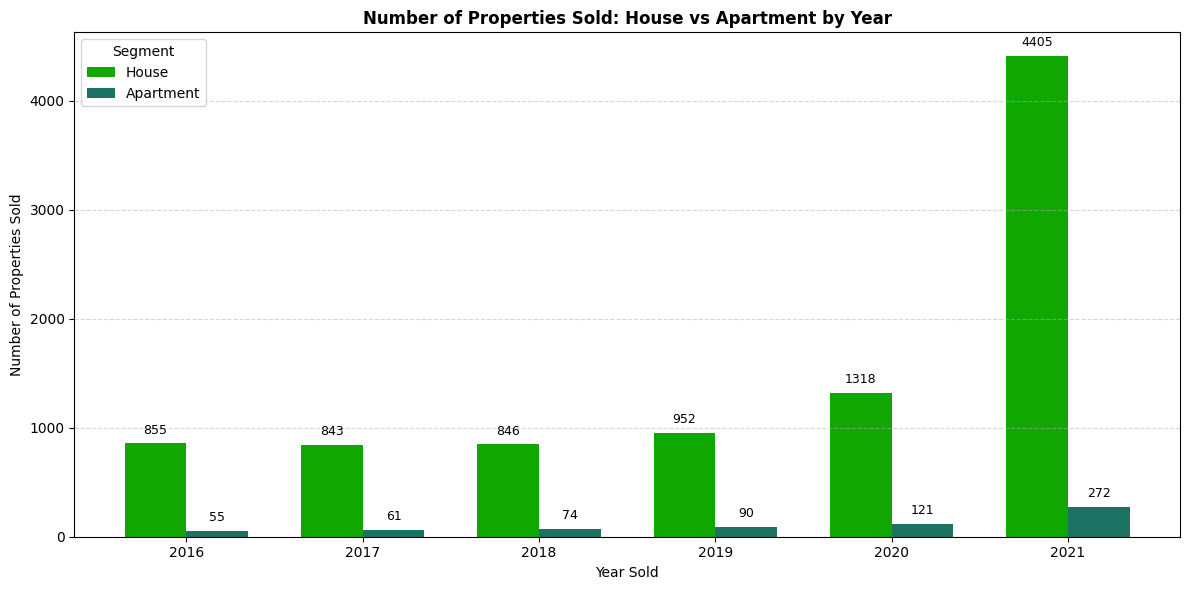

In [19]:
#clone data:
filtered_df=domain_df

# Count number of properties sold by year and segment
property_count = filtered_df.groupby(['year_sold', 'segment'])['price'].count().reset_index()
property_pivot = property_count.pivot(index='year_sold', columns='segment', values='price')

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
years = property_pivot.index
x = range(len(years))

# Bars
bars1 = ax.bar(
    [i - bar_width/2 for i in x],
    property_pivot['House'],
    width=bar_width,
    label='House',
    color='#10a800'
)
bars2 = ax.bar(
    [i + bar_width/2 for i in x],
    property_pivot['Apartment'],
    width=bar_width,
    label='Apartment',
    color='#1d7363'
)

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year Sold')
ax.set_ylabel('Number of Properties Sold')
ax.set_title('Number of Properties Sold: House vs Apartment by Year', fontweight='bold')
ax.legend(title='Segment')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


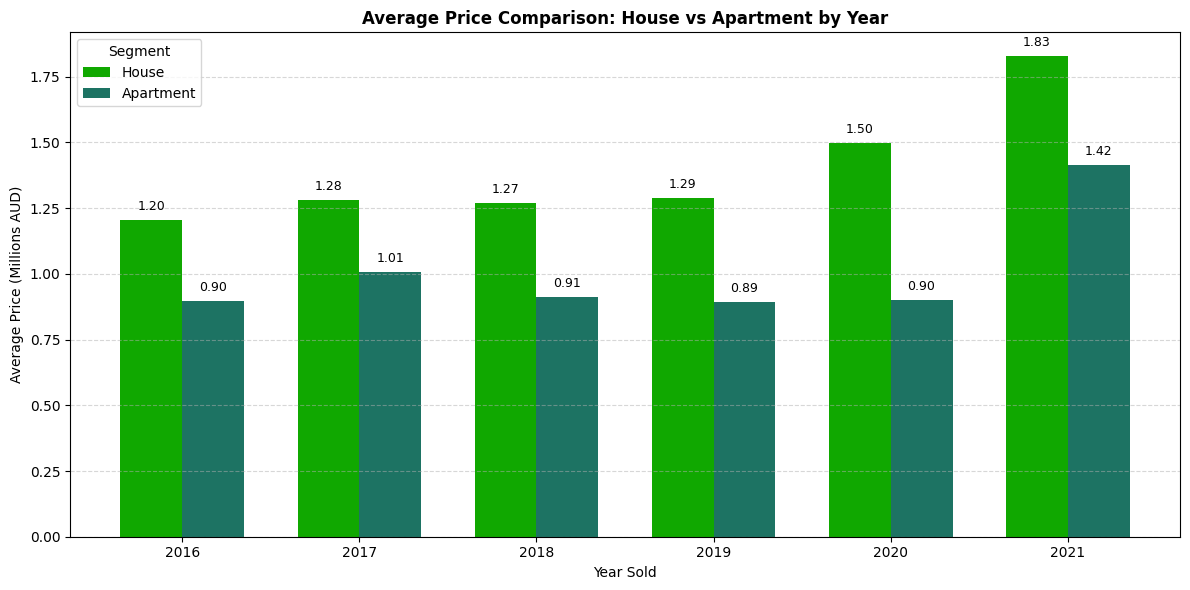

In [20]:
# Filter only House and Apartment data
filtered_df = domain_df[(domain_df['segment'].isin(['House', 'Apartment'])) & (domain_df['year_sold'] != 2022)]
avg_price = filtered_df.groupby(['year_sold', 'segment'])['price'].mean().reset_index()
avg_price_pivot = avg_price.pivot(index='year_sold', columns='segment', values='price')

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
years = avg_price_pivot.index
x = range(len(years))

# Bar heights in millions
house_prices = avg_price_pivot['House'] / 1e6
apartment_prices = avg_price_pivot['Apartment'] / 1e6

# Plot bars
bars1 = ax.bar([i - bar_width/2 for i in x], house_prices, width=bar_width, label='House', color='#10a800')
bars2 = ax.bar([i + bar_width/2 for i in x], apartment_prices, width=bar_width, label='Apartment', color='#1d7363')

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year Sold')
ax.set_ylabel('Average Price (Millions AUD)')
ax.set_title('Average Price Comparison: House vs Apartment by Year', fontweight='bold')
ax.legend(title='Segment')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- Suburb Housing Price Overview

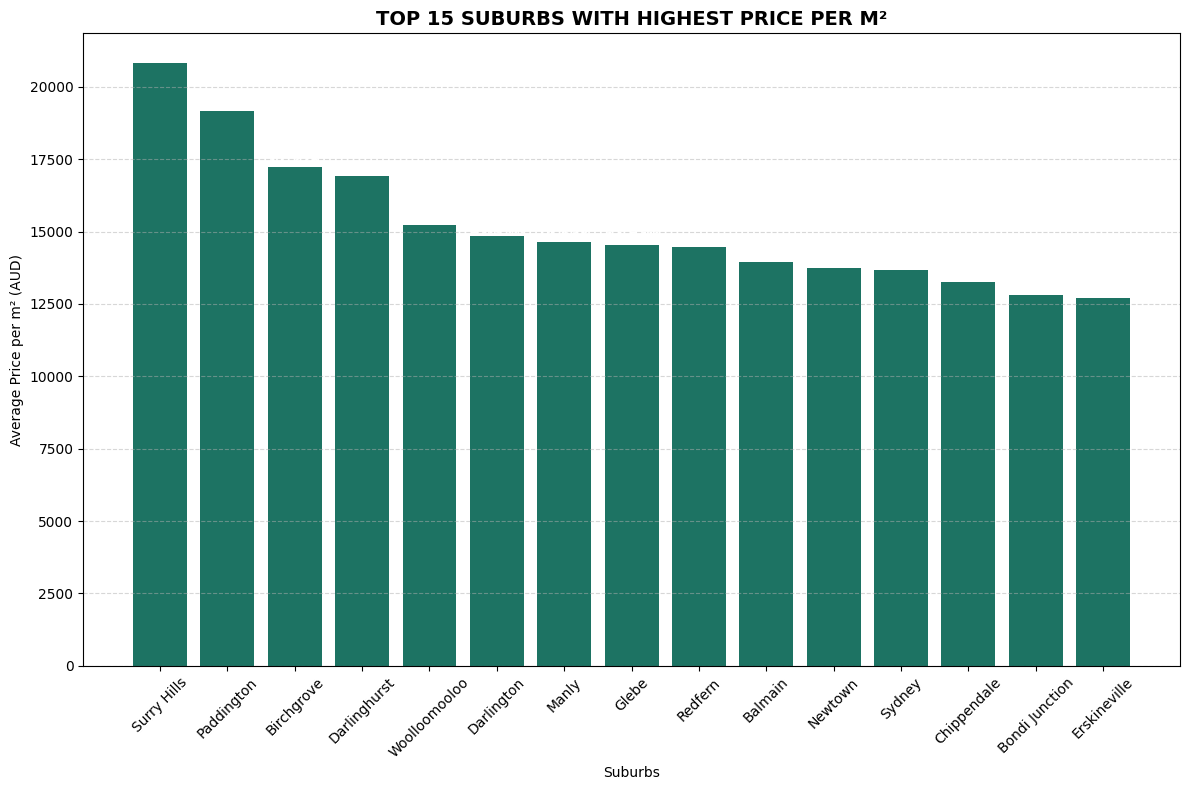

In [21]:
filtered_suburbs = domain_df.groupby('suburb').filter(lambda x: x['price'].count() >= 10)
mean_prices = (filtered_suburbs.groupby('suburb')['price_per_square'].mean().reset_index().sort_values(by='price_per_square', ascending=False).head(15))

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_prices['suburb'], mean_prices['price_per_square'], color='#1d7363')

# Add white value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e3:.2f}K',
             ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.title('TOP 15 SUBURBS WITH HIGHEST PRICE PER M²', fontweight='bold', fontsize=14)
plt.xlabel('Suburbs')
plt.ylabel('Average Price per m² (AUD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- The relationship between housing price and suburb's feature (Population & Income)

C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\1900319574.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['suburb_med_income'] = domain_df['suburb_median_income'].apply(categorize_argument, args=(10000, 100000, 10000))
C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\1900319574.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['sub_population_per_km2'] = domain_df['suburb_population_per_km2'].apply(categorize_distance, args=(0, 20000, 1000))


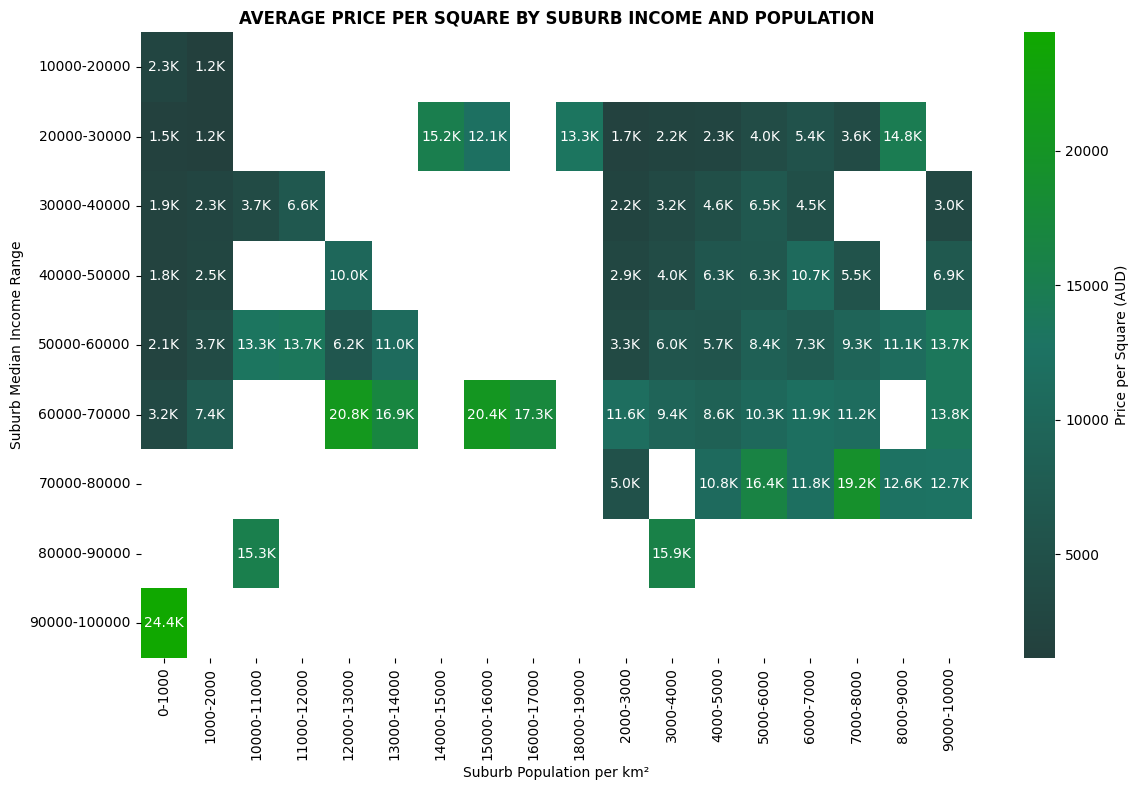

In [22]:
def categorize_argument(value, min_val, max_val, step):
    bins = list(range(min_val, max_val + step, step))
    labels = [f"{b}-{b + step}" for b in bins[:-1]]
    return pd.cut([value], bins=bins, labels=labels, include_lowest=True)[0]

def categorize_distance(value, min_val, max_val, step):
    bins = list(range(min_val, max_val + step, step))
    labels = [f"{b}-{b + step}" for b in bins[:-1]]
    return pd.cut([value], bins=bins, labels=labels, include_lowest=True)[0]

#theme color
custom_cmap = LinearSegmentedColormap.from_list("custom_green_teal", ['#23403d','#1d7363','#10a800'])

#Group and reshape data for heatmap
domain_df['suburb_med_income'] = domain_df['suburb_median_income'].apply(categorize_argument, args=(10000, 100000, 10000))
domain_df['sub_population_per_km2'] = domain_df['suburb_population_per_km2'].apply(categorize_distance, args=(0, 20000, 1000))
grouped_data = (domain_df.groupby(['suburb_med_income', 'sub_population_per_km2'])['price_per_square'].mean().unstack())

#Plot heatmap with custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt='.0f', cmap=custom_cmap,
            annot_kws={"size": 10, "color": "white"}, cbar_kws={'label': 'Price per Square (AUD)'})

for text in plt.gca().texts:
    text.set_text(f"{float(text.get_text())/1000:.1f}K")
plt.title('AVERAGE PRICE PER SQUARE BY SUBURB INCOME AND POPULATION', fontweight='bold')
plt.xlabel('Suburb Population per km²')
plt.ylabel('Suburb Median Income Range')
plt.tight_layout()
plt.show()


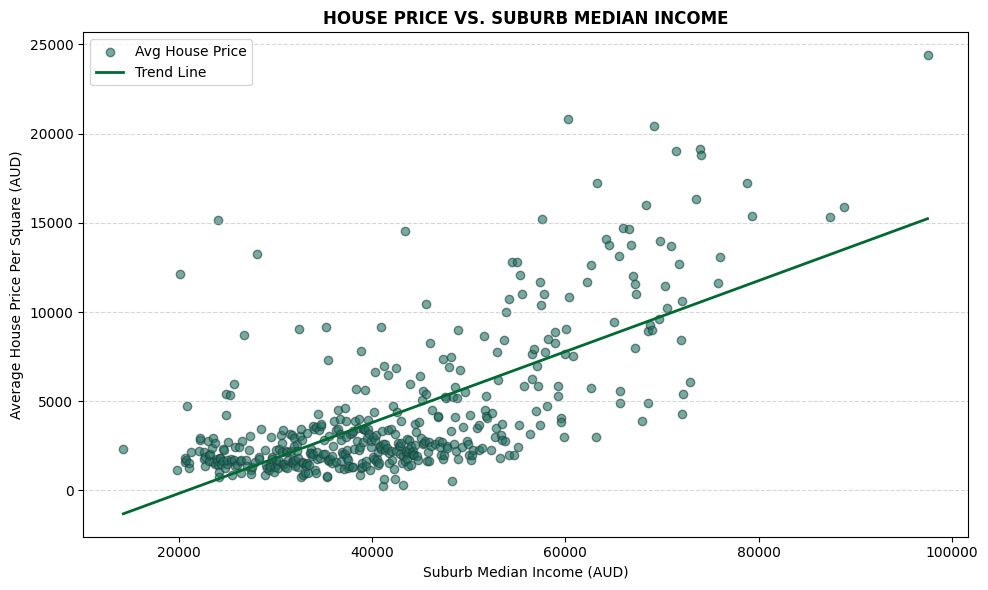

In [23]:
modified_data=domain_df

# Group by suburb median income
grouped = modified_data.groupby('suburb_median_income')['price_per_square'].mean().reset_index()
x = grouped['suburb_median_income']
y = grouped['price_per_square']

# Fit regression line
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#1d7363', edgecolors='#23403d', alpha=0.6, label='Avg House Price')
plt.plot(x, trendline, color='#006A32', linewidth=2, label='Trend Line')
plt.xlabel('Suburb Median Income (AUD)')
plt.ylabel('Average House Price Per Square (AUD)')
plt.title('HOUSE PRICE VS. SUBURB MEDIAN INCOME', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [185]:
x = domain_df['suburb_median_income']
y = domain_df['price_per_square']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: 0.447


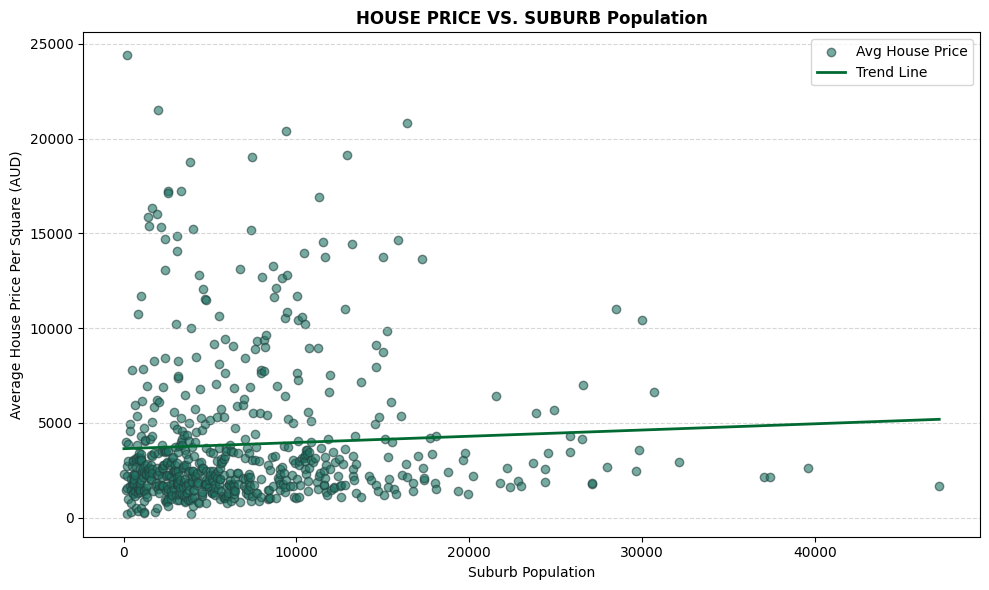

In [24]:
modified_data=domain_df
# Group by suburb median income
grouped = modified_data.groupby('suburb_population')['price_per_square'].mean().reset_index()
x = grouped['suburb_population']
y = grouped['price_per_square']

# Fit regression line
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#1d7363', edgecolors='#23403d', alpha=0.6, label='Avg House Price')
plt.plot(x, trendline, color='#006A32', linewidth=2, label='Trend Line')
plt.xlabel('Suburb Population')
plt.ylabel('Average House Price Per Square (AUD)')
plt.title('HOUSE PRICE VS. SUBURB Population', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [187]:
x = domain_df['suburb_population']
y = domain_df['price_per_square']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: 0.043


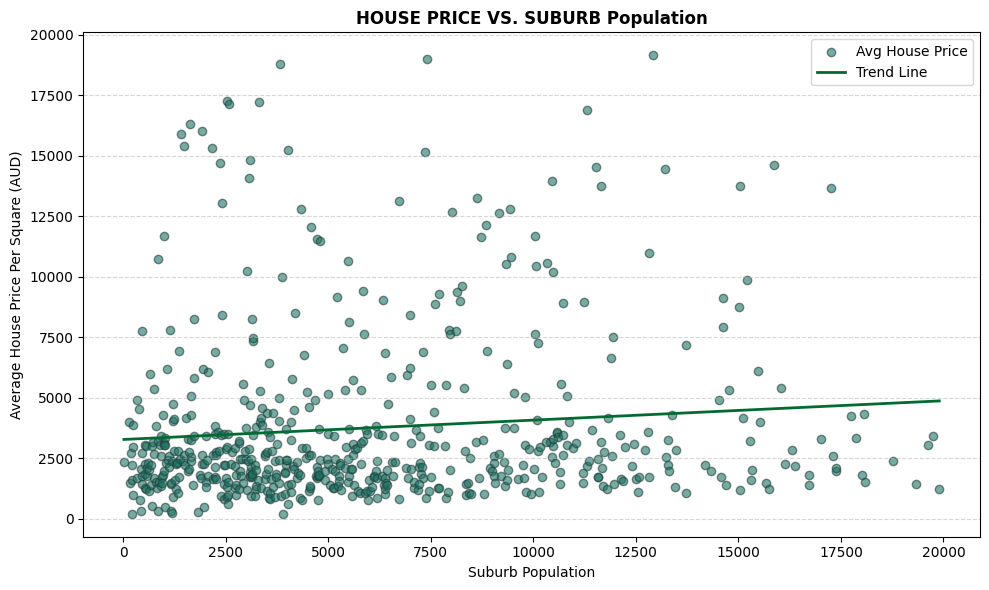

In [25]:
modified_data=domain_df
# Group by suburb median income
grouped = modified_data.groupby('suburb_population')['price_per_square'].mean().reset_index()

#REMOVE EXTEME DATA POINT
grouped=grouped[(grouped['suburb_population']<20000)&(grouped['price_per_square']<20000)]
x = grouped['suburb_population']
y = grouped['price_per_square']

# Fit regression line
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#1d7363', edgecolors='#23403d', alpha=0.6, label='Avg House Price')
plt.plot(x, trendline, color='#006A32', linewidth=2, label='Trend Line')
plt.xlabel('Suburb Population')
plt.ylabel('Average House Price Per Square (AUD)')
plt.title('HOUSE PRICE VS. SUBURB Population', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [189]:
x = grouped['suburb_population']
y = grouped['price_per_square']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: 0.095


- The relationship between housing price with Distance from CBD

C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\3805399130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_data['int_distance_from_CBD']=modified_data['km_from_cbd'].apply(categorize_distance,args=(-1,100,1))


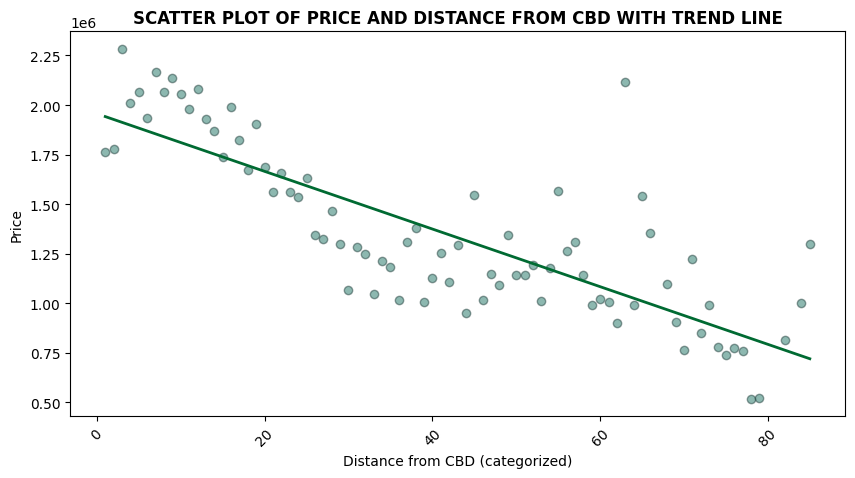

In [26]:

def categorize_distance(value, start, end, interval):
    return int((value - start) // interval)

modified_data=domain_df
modified_data['int_distance_from_CBD']=modified_data['km_from_cbd'].apply(categorize_distance,args=(-1,100,1))
modified_data = modified_data.sort_values(by='int_distance_from_CBD')
modified_data =modified_data.groupby('int_distance_from_CBD')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
x = modified_data['int_distance_from_CBD'].astype(int)
y = modified_data['price']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# The trend line
plt.plot(x, trendline, color='#006A32', linewidth=2)

plt.xticks(rotation=45)
plt.xlabel('Distance from CBD (categorized)')
plt.ylabel('Price')
plt.title('SCATTER PLOT OF PRICE AND DISTANCE FROM CBD WITH TREND LINE', fontweight='bold')

plt.scatter(modified_data['int_distance_from_CBD'],modified_data['price'],marker='o',color='#1d7363', edgecolors='#23403d',alpha=0.5)
plt.show()

In [191]:
x = domain_df['int_distance_from_CBD']
y = domain_df['price']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: -0.464


- The relationship between housing price with suburb elevation

C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\3767698808.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['sub_elevation'] = domain_df['suburb_elevation'].apply(categorize_distance, args=(0, 500, 50))


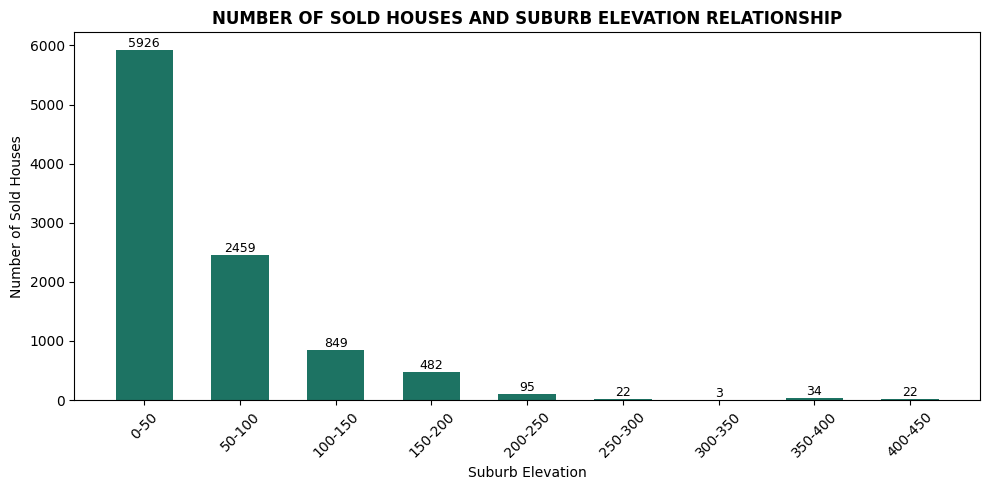

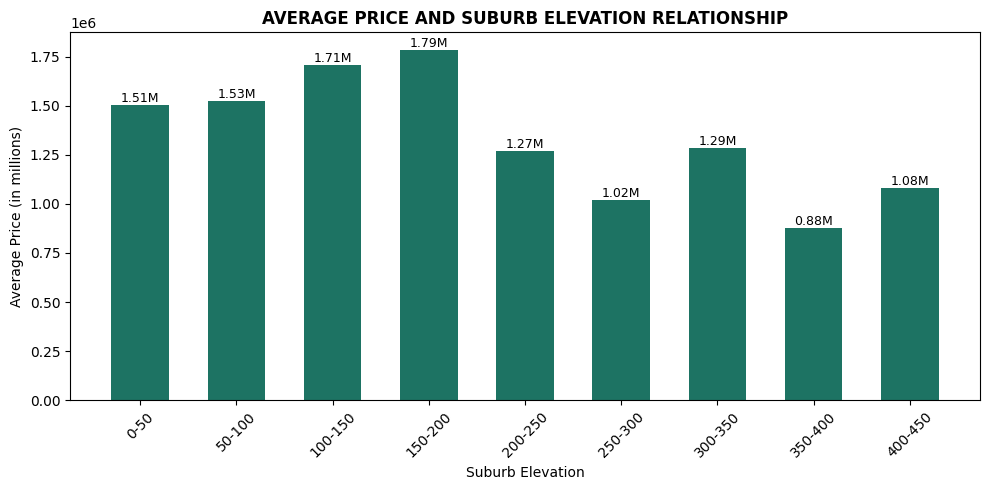

In [27]:
def categorize_distance(value, start, end, interval):
    for i in range(start, end, interval):
        if i <= value < i + interval:
            return f"{i}-{i+interval}"
    return f"{end-interval}-{end}"

def plot_bar_chart(data, x_col, y_col, xlabel, ylabel, title, width=0.6, y_format=None):
    plt.figure(figsize=(10, 5))
    bars = plt.bar(data[x_col], data[y_col], width=width, color='#1d7363')
    
    for bar, value in zip(bars, data[y_col]):
        height = bar.get_height()
        label = y_format(value) if y_format else str(value)
        plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=9)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def sort_elevation_bins(df, col):
    def extract_start(elevation_range):
        try:
            return int(elevation_range.split('-')[0])
        except:
            return 9999  # fallback for bad values
    return df.sort_values(by=col, key=lambda x: x.map(extract_start))

domain_df['sub_elevation'] = domain_df['suburb_elevation'].apply(categorize_distance, args=(0, 500, 50))

# Group and plot number of houses sold
grouped_data_count = domain_df.groupby('sub_elevation')['price'].count().reset_index()
grouped_data_count = sort_elevation_bins(grouped_data_count, 'sub_elevation')
plot_bar_chart(
    grouped_data_count, 'sub_elevation', 'price',
    'Suburb Elevation', 'Number of Sold Houses',
    'NUMBER OF SOLD HOUSES AND SUBURB ELEVATION RELATIONSHIP'
)

# Group and plot average price
grouped_data_mean = domain_df.groupby('sub_elevation')['price'].mean().reset_index()
grouped_data_mean = sort_elevation_bins(grouped_data_mean, 'sub_elevation')
plot_bar_chart(
    grouped_data_mean, 'sub_elevation', 'price',
    'Suburb Elevation', 'Average Price (in millions)',
    'AVERAGE PRICE AND SUBURB ELEVATION RELATIONSHIP',
    y_format=lambda x: f'{x/1e6:.2f}M'
)


The average price of houses at elevations of 150 meters and lower seems higher than those at elevations over 200 meters. Additionally, the number of houses sold decreases as elevation increases.

- Housing Price and Properties's Feature Analysis

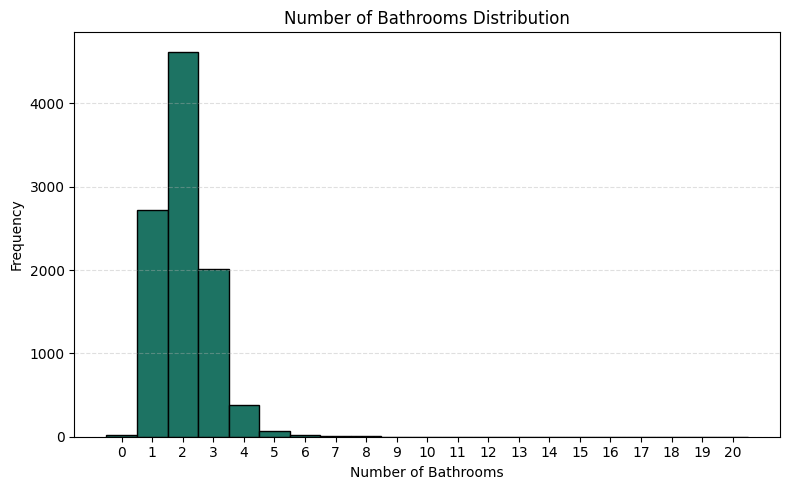

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(domain_df['num_bath'], bins=range(int(domain_df['num_bath'].min()), int(domain_df['num_bath'].max()) + 2), color='#1d7363', edgecolor='black', align='left')
plt.title('Number of Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Set integer x-ticks
plt.xticks(np.arange(domain_df['num_bath'].min(), domain_df['num_bath'].max() + 1, 1).astype(int))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

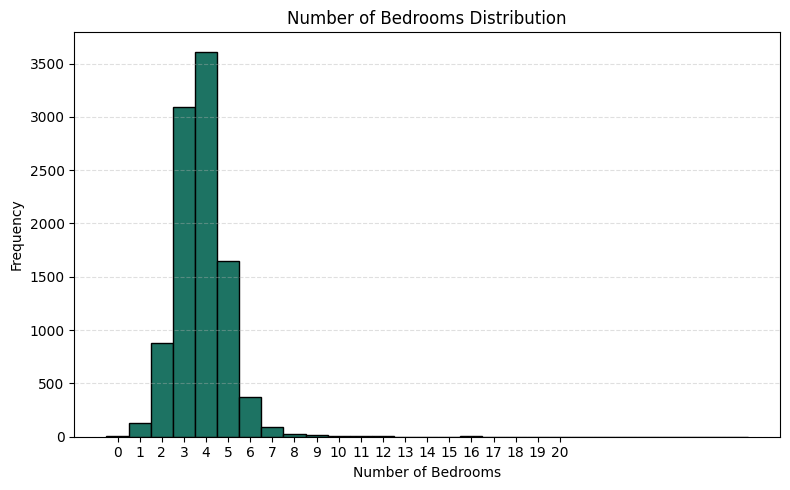

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(domain_df['num_bed'], bins=range(int(domain_df['num_bed'].min()), int(domain_df['num_bed'].max()) + 2), color='#1d7363', edgecolor='black', align='left')
plt.title('Number of Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Set integer x-ticks
plt.xticks(np.arange(domain_df['num_bath'].min(), domain_df['num_bath'].max() + 1, 1).astype(int))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


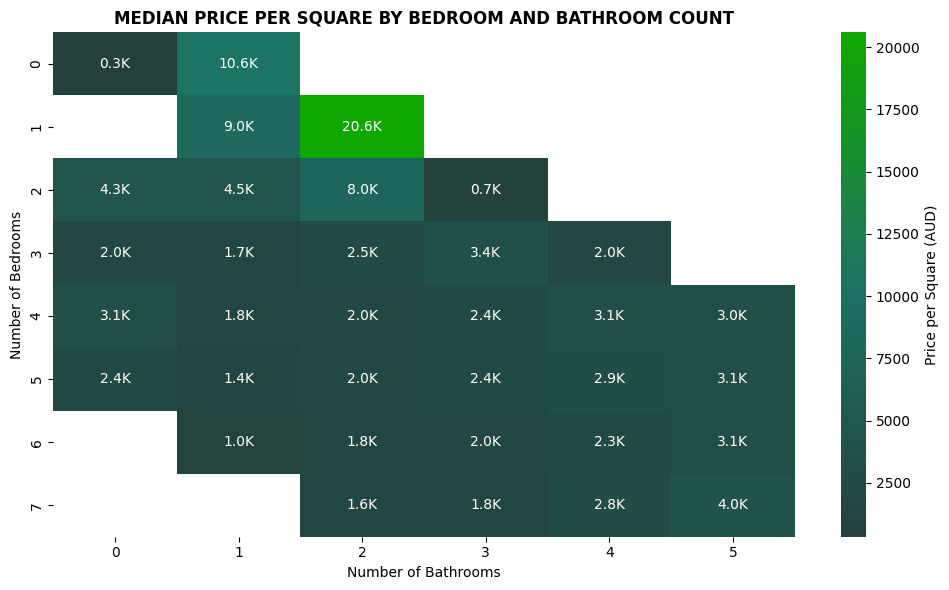

In [30]:
custom_cmap = LinearSegmentedColormap.from_list("custom_green_teal", ['#23403d','#1d7363','#10a800'])

filtered_data = domain_df[(domain_df['num_bath'] <= 5) & (domain_df['num_bed'] <= 7)]
#Create pivot table for median price per square
pivot_table = filtered_data.pivot_table(
    values='price_per_square',
    index='num_bed',
    columns='num_bath',
    aggfunc='median'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap=custom_cmap, 
    annot_kws={"size": 10, "color": "white"},
    cbar_kws={'label': 'Price per Square (AUD)'}
)

#Format annotations to 'K'
for text in plt.gca().texts:
    try:
        val = float(text.get_text())
        text.set_text(f"{val/1000:.1f}K")
    except ValueError:
        pass  
plt.title('MEDIAN PRICE PER SQUARE BY BEDROOM AND BATHROOM COUNT', fontweight='bold')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.tight_layout()
plt.show()

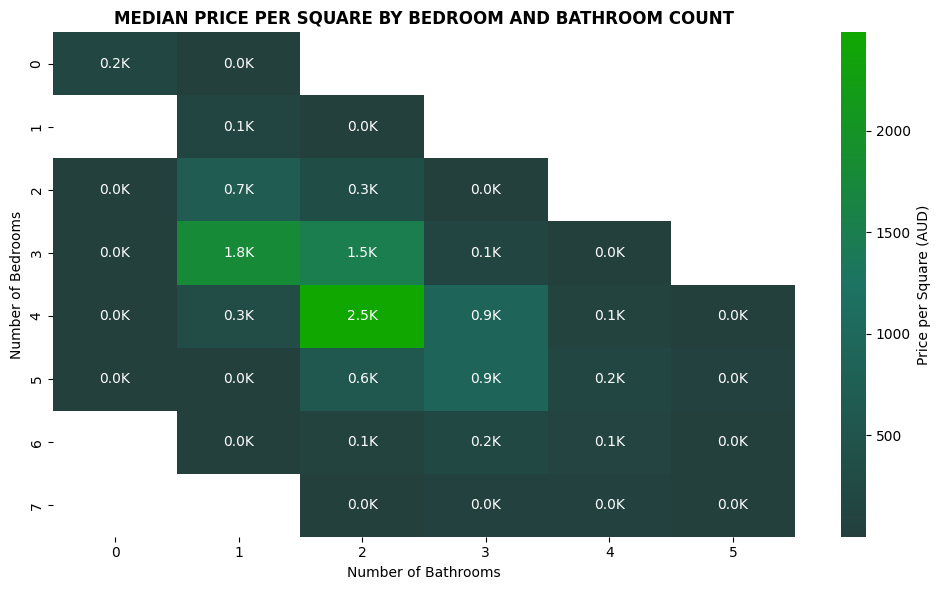

In [198]:
#Create pivot table for median price per square
pivot_table = filtered_data.pivot_table(
    values='price',  # or any column
    index='num_bed',
    columns='num_bath',
    aggfunc='count'
)

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap=custom_cmap, 
    annot_kws={"size": 10, "color": "white"},
    cbar_kws={'label': 'Price per Square (AUD)'}
)

# Format annotations to 'K'
for text in plt.gca().texts:
    try:
        val = float(text.get_text())
        text.set_text(f"{val/1000:.1f}K")
    except ValueError:
        pass  

# Add titles and labels
plt.title('MEDIAN PRICE PER SQUARE BY BEDROOM AND BATHROOM COUNT', fontweight='bold')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.tight_layout()
plt.show()

In [31]:
domain_df[
    (domain_df['num_bath'] <= 5) & 
    (domain_df['num_bath'] >= 1) & 
    (domain_df['num_bed'] <= 7) & 
    (domain_df['num_bed'] >= 2)
]['price'].count()


9654

In [32]:
domain_df['price'].count()

9892

* Statistic Evidence for Number of Bedrooms - Baths and Pricing Relationship

In [35]:
domain_df['log_price'] = np.log(domain_df['price'])

domain_df['bed_bath_interaction'] = domain_df['num_bed'] * domain_df['num_bath']

X = domain_df[['num_bed', 'num_bath', 'bed_bath_interaction']]
X = sm.add_constant(X)
model = sm.OLS(domain_df['log_price'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     533.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          4.51e-321
Time:                        17:42:23   Log-Likelihood:                -6505.3
No. Observations:                9892   AIC:                         1.302e+04
Df Residuals:                    9888   BIC:                         1.305e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.5120 

C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\3990538328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['log_price'] = np.log(domain_df['price'])
C:\Users\UOW\AppData\Local\Temp\ipykernel_4400\3990538328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['bed_bath_interaction'] = domain_df['num_bed'] * domain_df['num_bath']


IV. Data Prediction
1. Data Preparation for predictor

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from time import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
prediction_df= domain_df

In [ ]:
#Label  
prediction_df['suburb'] = prediction_df['suburb'].astype('category').cat.codes
encoder = LabelEncoder()
prediction_df['house_type'] = encoder.fit_transform(prediction_df['type'])

2. Choose 1 in 2 options below before running section 3

* Feature Engineering for suburb average price following by Year

In [275]:
group_data_mean = prediction_df.groupby(['suburb', 'year_sold'])['price'].mean().reset_index()
group_data_mean.rename(columns={'price': 'suburb_mean_price'}, inplace=True)
prediction_df = pd.merge(prediction_df, group_data_mean, on=['suburb', 'year_sold'])
df=prediction_df.sort_values(by='date_sold')
df['timestemp']=df['date_sold'].rank(ascending=True)

# Ensure the target variable is `price` and remove unnecessary columns
features = ['suburb_mean_price', 'num_bath', 'num_bed', 'num_parking', 'property_size','timestemp','suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_elevation', 'cash_rate','property_inflation_index','km_from_cbd','house_type']
X = df[features]
y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

* Without Feature Engineering (Run this first before run the below code)

In [ ]:
prediction_df= domain_df

In [271]:
prediction_df['suburb'] = prediction_df['suburb'].astype('category').cat.codes
encoder = LabelEncoder()
prediction_df['house_type'] = encoder.fit_transform(prediction_df['type'])
df=prediction_df.sort_values(by='date_sold')
df['timestemp']=df['date_sold'].rank(ascending=True)

# Ensure the target variable is `price` and remove unnecessary columns
features = ['num_bath', 'num_bed', 'num_parking', 'property_size','timestemp','suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_elevation', 'cash_rate','property_inflation_index','km_from_cbd','house_type']
X = df[features]
y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

3. Prediction Model
- Random Forest Regression Model

In [268]:
rand_regr = RandomForestRegressor(n_estimators=400, random_state=0)
rand_regr.fit(X_train, y_train)
predictions = rand_regr.predict(X_test)

# Metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
exp_rand = explained_variance_score(y_test, predictions)

# Print results
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)
print("Explained Variance Score:", exp_rand)


R2 Score: 0.8000793883024628
MAE: 219163.30883043457
MAPE: 0.14614765536430566
Explained Variance Score: 0.8003347293647766


C:\Users\UOW\AppData\Local\Temp\ipykernel_11792\32163931.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




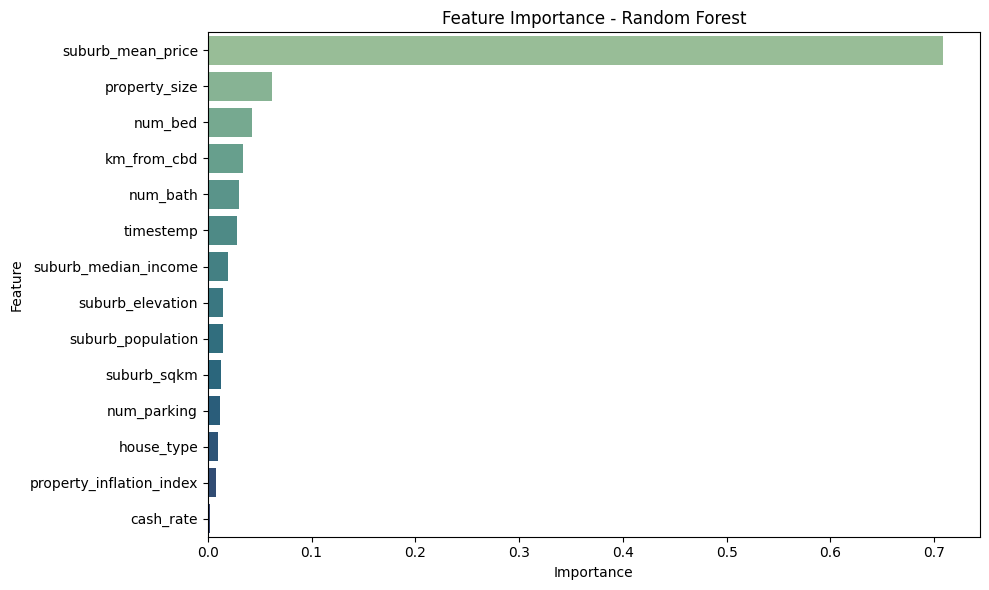

In [269]:
feature_importance = rand_regr.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


* Gradient Boosting Regression Model

In [276]:
# Model
gb_regr = GradientBoostingRegressor(n_estimators=400, random_state=0)
gb_regr.fit(X_train, y_train)
predictions_gb = gb_regr.predict(X_test)

# Metrics
r2_gb = r2_score(y_test, predictions_gb)
mae_gb = mean_absolute_error(y_test, predictions_gb)
mape_gb = mean_absolute_percentage_error(y_test, predictions_gb)
exp_gb = explained_variance_score(y_test, predictions_gb)

# Print results
print("R2 Score:", r2_gb)
print("MAE:", mae_gb)
print("MAPE:", mape_gb)
print("Explained Variance Score:", exp_gb)

R2 Score: 0.8157363330904173
MAE: 210774.81204177073
MAPE: 0.13979924268073635
Explained Variance Score: 0.8157676264334166


C:\Users\UOW\AppData\Local\Temp\ipykernel_11792\3602411432.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




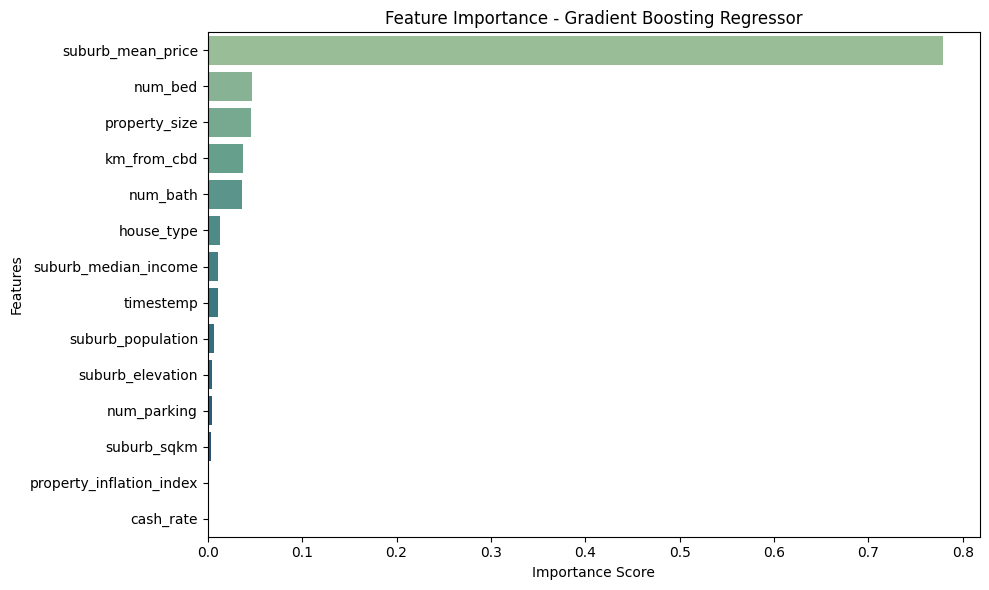

In [277]:
# Extract feature importances
feature_importance_gb = gb_regr.feature_importances_

# Create a DataFrame
importance_df_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_gb
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='crest')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


- LSTM model

In [262]:
# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=16, verbose=1)

# Predict on test set
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
mape = mean_absolute_percentage_error(y_actual, y_pred)
explained_var = explained_variance_score(y_actual, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Explained Variance Score: {explained_var:.4f}")

Epoch 1/10


C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0572
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0097
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0098
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0086
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088
Epoch 9/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090
Epoch 10/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0090
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
R-squared (R²): 0.7835
Mean Absolute Error (MAE): 235,246.50
Mean Absolute Percentage Error (MAPE): 16.11%
Explained Variance Score: 0.7846


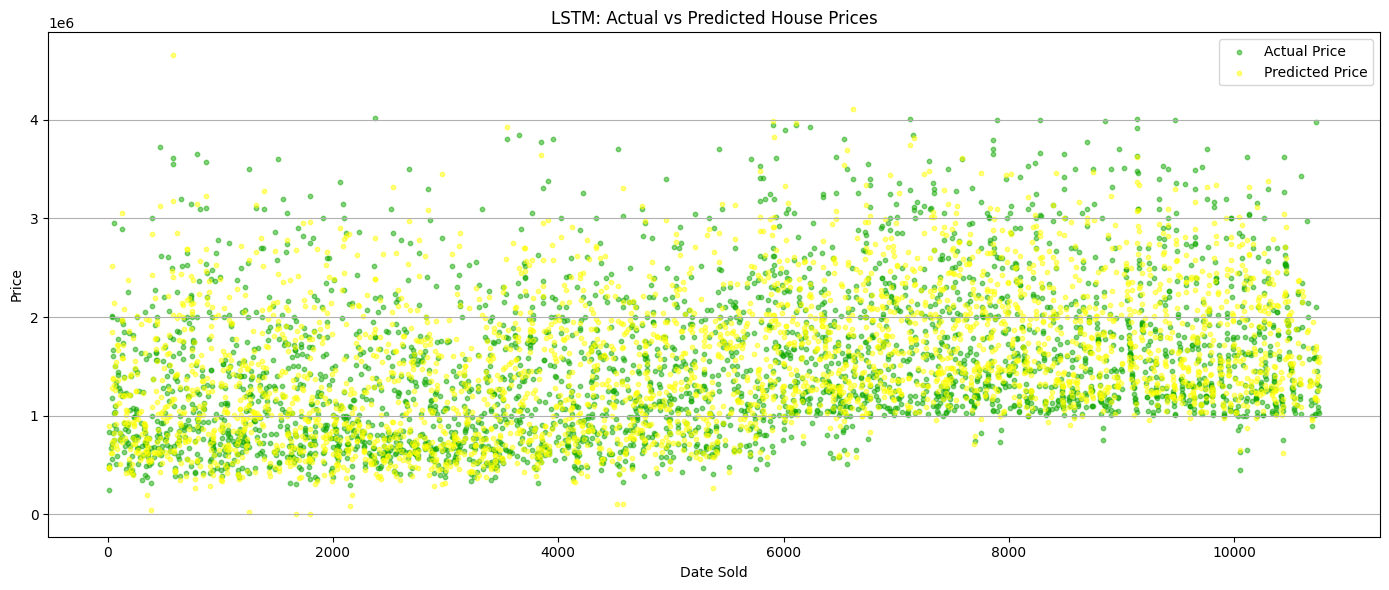

In [263]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test.index, y_test, label='Actual Price', color='#10a800', s=10, alpha=0.5)
plt.scatter(y_test.index, y_pred, label='Predicted Price', color='yellow', s=10, alpha=0.5)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('LSTM: Actual vs Predicted House Prices')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- ARIMA model

In [249]:
#Define dataset again with date_sold index
df = prediction_df.sort_values(by='date_sold')  
df.set_index('date_sold', inplace=True)
features = ['suburb_mean_price', 'num_bath', 'num_bed', 'num_parking', 'property_size',
            'suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_elevation',
            'cash_rate', 'property_inflation_index', 'km_from_cbd', 'house_type']
X = df[features]
y = df['price']

# Train-test split
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Automatically determine (p, d, q)
auto_model = auto_arima(y_train, exogenous=X_train, seasonal=False, trace=True,
                         error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the best order
print("Best ARIMA order:", auto_model.order)

# Fit the SARIMAX model with the selected (p, d, q)
model = SARIMAX(y_train, exog=X_train, order=(1,1,4))
model_fit = model.fit()
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# Predict on the test set
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
print(f"Explained Variance Score: {explained_var:.4f}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=258062.629, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=256845.112, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255991.895, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=258060.629, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.85 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=255989.895, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=3.97 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=2.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=256843.112, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=5.48 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 38.051 seconds
Best ARIMA order: (0, 1, 1)


C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n

R-squared (R²): 0.5994
Mean Absolute Error (MAE): 309,810.06
Mean Absolute Percentage Error (MAPE): 18.2503%
Explained Variance Score: 0.6006


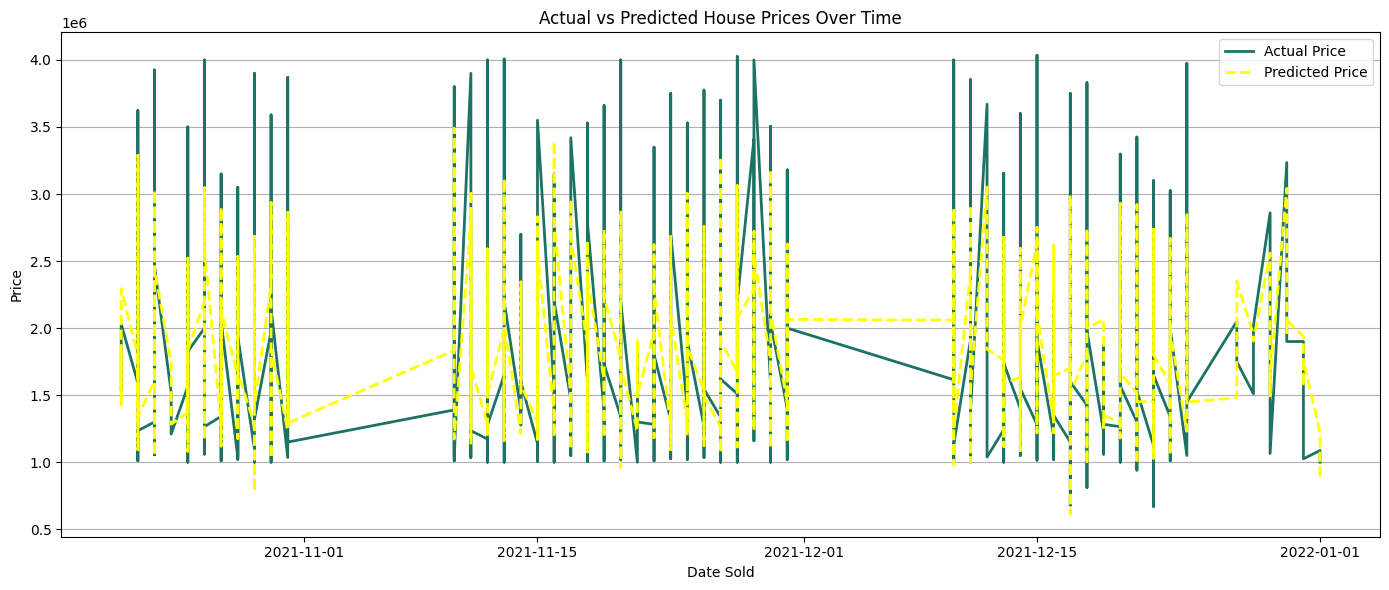

In [250]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='#1d7363', linewidth=2)#23403d','#1d7363','#10a800
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--', color='yellow', linewidth=2)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices Over Time')
plt.legend()
plt.grid(axis='y')  # Show grid only for Y-axis
plt.tight_layout()
plt.show()



V. CONCLUSION

1. Model Selection 

* Based on the evaluation metrics, choosing Gradient Boosting Regression is the most appropriate decision for this project. It achieved the highest R² score of nearly 0.82, which means that the model is able to explain approximately 82% of the variability in house prices — indicating strong predictive power.

* It also recorded the lowest MAE of 210,000, meaning that, on average, the predicted house prices differ from the actual prices by only $210K — a relatively low error given the scale of property prices. Furthermore, the model delivered the lowest MAPE of 13%, showing that the average prediction error is only 13% relative to actual values, making it a highly reliable model for estimating property prices.

2. Investment Strategy

* These days, investing in property isn’t easy. The market's competitive, unpredictable, and shaped by factors far beyond our control. But whether you're buying for your family or thinking long-term about investment, the key is to choose wisely based on what really matters: income levels in the area, elevation, and the overall environment — all of which we explored earlier in the analysis.

* When it comes to house features, 3–4 bedrooms and 2–3 bathrooms are the sweet spot, they show up most often in the data, making them less competitive and easier to find. Oddly enough, 2-bed, 2-bath homes top the list in price, likely because of their compact convenience, while options with 1 bathroom, 2–4 bedrooms tend to be more affordable.

* Of course, the future is hard to predict. Economic shocks — like the pandemic — triggered housing spikes, with prices soaring up to 300% in some areas. So, whether you're buying your dream home or looking for a solid investment, the smartest thing you can do is understand the trends, know your priorities, and trust the data.